# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), 'data', 'airbnbListingsData.csv')
df = pd.read_csv(filename, low_memory=False, header=0)
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.shape

(28022, 50)

In [5]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [6]:
df['review_scores_rating'].head(10)

0    4.70
1    4.45
2    5.00
3    4.21
4    4.91
5    4.70
6    4.56
7    4.88
8    4.86
9    4.87
Name: review_scores_rating, dtype: float64

In [7]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [8]:
# dropping columns with unstructured text, and feature leakage (review_scores_)
dropped_colnames = list(['description', 'name', 'neighborhood_overview', 'host_about', 'host_name',
                         'host_location', 'amenities', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication',
                         'review_scores_location', 'review_scores_value'])
# , 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'
dropped_colnames

['description',
 'name',
 'neighborhood_overview',
 'host_about',
 'host_name',
 'host_location',
 'amenities',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [9]:
df = df.drop(dropped_colnames, axis=1)

In [10]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,0.80,0.17,True,8.0,8.0,True,True,Manhattan,Entire home/apt,1,...,0,0,4.70,False,3,3,0,0,0.33,9
1,0.09,0.69,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,...,32,0,4.45,False,1,1,0,0,4.86,6
2,1.00,0.25,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,...,1,0,5.00,False,1,1,0,0,0.02,3
3,1.00,1.00,True,1.0,1.0,True,True,Manhattan,Private room,2,...,33,2,4.21,False,1,0,1,0,3.68,4
4,NaN,NaN,True,1.0,1.0,True,True,Manhattan,Private room,1,...,0,0,4.91,False,1,0,1,0,0.87,7


In [11]:
# One-Hot Encoding categorical values
to_encode = list(df.select_dtypes(include=['object']).columns)
df[to_encode].nunique()

neighbourhood_group_cleansed    5
room_type                       4
dtype: int64

In [12]:
# creating and applying the encoder
encoder = OneHotEncoder(handle_unknown='error', sparse=False)
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))

# reinstating original column names
df_enc.columns = encoder.get_feature_names(to_encode)

df_enc.head()

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# dropping original columns we transformed from DataFrame 'df'
df.drop(columns=to_encode, axis=1, inplace=True)
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,0.80,0.17,True,8.0,8.0,True,True,1,1.0,NaN,...,0,0,4.70,False,3,3,0,0,0.33,9
1,0.09,0.69,True,1.0,1.0,True,True,3,1.0,1.0,...,32,0,4.45,False,1,1,0,0,4.86,6
2,1.00,0.25,True,1.0,1.0,True,True,4,1.5,2.0,...,1,0,5.00,False,1,1,0,0,0.02,3
3,1.00,1.00,True,1.0,1.0,True,True,2,1.0,1.0,...,33,2,4.21,False,1,0,1,0,3.68,4
4,NaN,NaN,True,1.0,1.0,True,True,1,1.0,1.0,...,0,0,4.91,False,1,0,1,0,0.87,7


In [14]:
# joining categorical features in df_enc with df
df = df.join(df_enc)
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications', 'neighbourhood_group_cleansed_Bronx',
    

In [15]:
# identifying missingness
nan_count = np.sum(df.isnull(), axis=0)
nan_count

host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm      

In [16]:
# series of T/F values indicating whether missing values is not 0
nan_detected = nan_count > 0

# series of T/F values indicating whether type of column is int64 or float64
is_int_or_float = df.dtypes != 'object'

# combining binary series values into 'to_impute'
to_impute = nan_detected & is_int_or_float

df.columns[to_impute]

Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds'], dtype='object')

In [17]:
to_impute_selected = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds']

# creating dummy variables in new series of T/F values indicating missingness of values
for colname in to_impute_selected:
    df[colname + '_na'] = df[colname].isnull()
    
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_rate_na,host_acceptance_rate_na,bedrooms_na,beds_na
0,0.80,0.17,True,8.0,8.0,True,True,1,1.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,False,False,True,False
1,0.09,0.69,True,1.0,1.0,True,True,3,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False
2,1.00,0.25,True,1.0,1.0,True,True,4,1.5,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False
3,1.00,1.00,True,1.0,1.0,True,True,2,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,False,False,False
4,NaN,NaN,True,1.0,1.0,True,True,1,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,True,True,False,False


In [18]:
# replacing missing values with mean values of columns
for colname in to_impute_selected:
    df[colname].fillna(value=df[colname].mean(), inplace=True)
    
for colname in to_impute_selected:
    print('{} missing values count: {}'.format(colname, np.sum(df[colname].isnull(), axis=0)))

host_response_rate missing values count: 0
host_acceptance_rate missing values count: 0
bedrooms missing values count: 0
beds missing values count: 0


In [19]:
# identifying features with the highest correlation with the label
corrs = df.corr()['review_scores_rating']
corrs

host_response_rate                              0.092494
host_acceptance_rate                            0.009669
host_is_superhost                                    NaN
host_listings_count                            -0.033200
host_total_listings_count                      -0.033200
host_has_profile_pic                                 NaN
host_identity_verified                               NaN
accommodates                                    0.007798
bathrooms                                      -0.002080
bedrooms                                        0.010882
beds                                            0.000223
price                                           0.045067
minimum_nights                                 -0.034514
maximum_nights                                 -0.012175
minimum_minimum_nights                         -0.042011
maximum_minimum_nights                         -0.032373
minimum_maximum_nights                         -0.005249
maximum_maximum_nights         

In [20]:
# sorting corrs in descending order
corrs_sorted = corrs.sort_values(axis=0, ascending=False)
corrs_sorted

review_scores_rating                            1.000000
room_type_Entire home/apt                       0.096000
host_response_rate                              0.092494
number_of_reviews_l30d                          0.067435
number_of_reviews                               0.067182
neighbourhood_group_cleansed_Brooklyn           0.051198
n_host_verifications                            0.050888
number_of_reviews_ltm                           0.045595
price                                           0.045067
reviews_per_month                               0.039317
has_availability                                0.030396
neighbourhood_group_cleansed_Staten Island      0.014503
host_response_rate_na                           0.010937
bedrooms                                        0.010882
host_acceptance_rate                            0.009669
accommodates                                    0.007798
beds                                            0.000223
bathrooms                      

In [21]:
# saving the relevant correlation values to analyze relationships between the features in plots
corrs_list = list(corrs_sorted.index[1:3])
corrs_list

['room_type_Entire home/apt', 'host_response_rate']

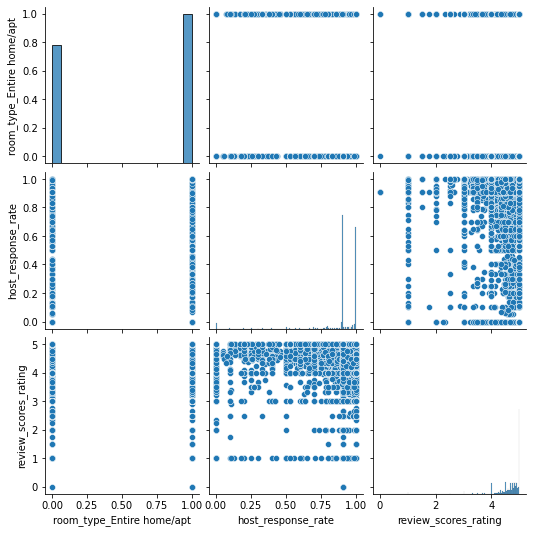

In [22]:
# producing bivariate plots for label and its top correlates
corrs_list.append('review_scores_rating')

df_sub = df[corrs_list]

sns.pairplot(data=df_sub)

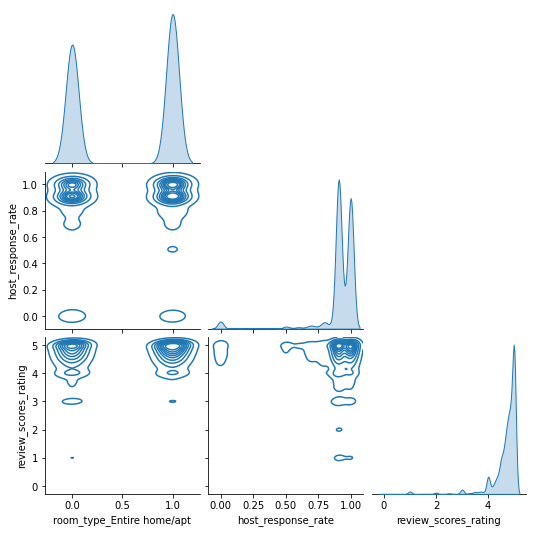

In [23]:
# pairplot specifying kernel density estimator for interpretability of data
sns.pairplot(data=df_sub, kind='kde', corner=True)

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [26]:
# creating labeled examples from DataFrame 'df'
y = df['review_scores_rating']
X = df.drop(columns='review_scores_rating', axis=1)

In [28]:
# splitting labeled examples into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [29]:
# specifying four models in a list of tuples

# running a GridSearch cross validation to find the optimal hyperparameters
# is computationally costly, so I specified a normal value for the hyperparameters

estimators = [('DT', DecisionTreeRegressor(max_depth=8)),
              ('RF', RandomForestRegressor()),
              ('GBDT', GradientBoostingRegressor(n_estimators=100)),
              ('LR', LinearRegression())
             ]

In [30]:
stacking_model = StackingRegressor(estimators=estimators, cv=5, passthrough=False)

In [31]:
# Obtaining 3-fold cross-validation RMSE scores from cross_val_score()
print('Start')

score = cross_val_score(stacking_model, X_train, y_train, scoring='neg_root_mean_squared_error')
rmse_avg = np.mean(-1 * score)

print('End')
print('average score: {}'.format(rmse_avg))

Start
End
average score: 0.47517026790431816


In [33]:
# Stacking
# fitting stacking_model to the training data
stacking_model.fit(X_train, y_train)

# using predict() to test use fitted model to make predictions on the test data
stacking_pred = stacking_model.predict(X_test)

# compute the Root Mean Squared Error using mean_squared_error()
rmse = mean_squared_error(y_test, stacking_pred, squared=False)

# compute the R-squared score using r2_score()
r2 = r2_score(y_test, stacking_pred)

print('[Stacking] Root Mean Squared Error: {0}'.format(rmse))
print('[Stacking] R2: {0}'.format(r2))

[Stacking] Root Mean Squared Error: 0.46313757716339593
[Stacking] R2: 0.1404644625213508


In [34]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.48344439541818285
[LR] R2: 0.06343729826935596


In [35]:
# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=50)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.48249391154124927
[DT] R2: 0.06711636734932946


In [36]:
# Gradient Boosted Decision Tree
gbdt_model = GradientBoostingRegressor(max_depth=2, n_estimators=300)
gbdt_model.fit(X_train, y_train)
y_gbdt_pred = gbdt_model.predict(X_test)
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))  

[GBDT] Root Mean Squared Error: 0.46721943674764427
[GBDT] R2: 0.12524667571424242


In [37]:
# Random Forest
rf_model = RandomForestRegressor(max_depth=32, n_estimators=300)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 0.47331414512804576
[RF] R2: 0.10227614466820589


<function matplotlib.pyplot.show>

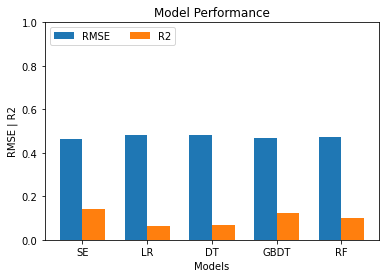

In [39]:
# Plotting the RMSE and R2 score for stacked ensemble model and each  regressor
rmse_results = [rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
r2_results = [r2, lr_r2, dt_r2, gbdt_r2, rf_r2]
labels = ['SE', 'LR', 'DT', 'GBDT', 'RF']

rg = np.arange(5)
width = 0.35

# creating bar plots with RMSE and R2 results
plt.bar(rg, rmse_results, width, label='RMSE')
plt.bar(rg + width, r2_results, width, label='R2')

# calling plt.xticks() to add labels under bars
plt.xticks(rg + width/2, labels)

plt.xlabel('Models')
plt.ylabel('RMSE | R2')

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show

<b>Analysis</b>: Analyzing the model performance of our stacking model with the individual models, we can easily see that the none of the models performed well. The stacking ensemble seems to perform the best, with the lowest RMSE and highest R2 score. This makes sense because the higher the residual squared score is, the better fit the model is for the data. Overall, I think that model performance could be improved if I did not drop the features with high correlation to 'review_scores_rating', such as in the list ['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']. However, by analyzing the features in my dataset I figured that keeping these features would likely lead to feature leakage, which is not something we want when building and training an optimal model. I think that I could look into predicting other features rather than 'review_scores_rating' because there isn't a high correlation with the other features.